## A Beginner's Guide to NumPy - Part 4

#### Recap of the Series

- **Part 1:** We started with the basics, learning how to create and manipulate NumPy arrays. We explored arithmetic operations and the importance of broadcasting, which enables array operations of varying shapes and sizes.
- **Part 2:** We delved into more specialized topics such as statistical, scientific, and trigonometric operations. Additionally, we covered essential techniques for array manipulation and slicing, enhancing our ability to handle and process data.
- **Part 3:** Our focus shifted to linear algebra. We explored the creation and manipulation of vectors and matrices and learned how to perform fundamental operations such as matrix multiplication, transposition, and calculating determinants.

In **Part 4**- We will examine vector transformations and eigenvectors, essential concepts in understanding the behavior of matrices under various operations and transformations.


## Linear Transformation

Linear transformations are fundamental operations in linear algebra that involve **transforming vectors or points from one space to another while preserving certain properties, such as linearity and origin**. In essence, *a linear transformation is a mathematical function that maps vectors from one vector space to another in a way that respects the vector space structure*. 

#### Scaling Transformation: 
A common linear transformation is scaling, where each component of a vector is multiplied by a constant factor. In 2D space, this corresponds to stretching or shrinking along each axis.

In [4]:
import numpy as np
# Define the scaling factor
scaling_factor = 2

# Define a 2D vector
vector = np.array([3, 4])

# Apply the scaling transformation
scaled_vector = scaling_factor * vector
print("Input vector:", vector)
print("Scaling factor:",scaling_factor)
print("Scaled Vector:",scaled_vector)

Input vector: [3 4]
Scaling factor: 2
Scaled Vector: [6 8]


Let's visualize 

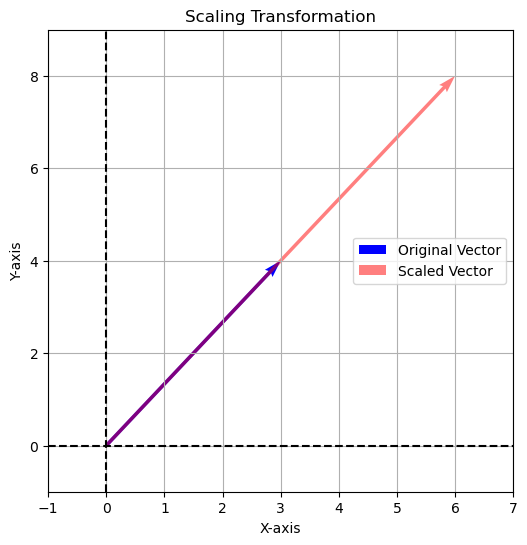

In [11]:
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(6, 6))
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original Vector')
plt.quiver(0, 0, scaled_vector[0], scaled_vector[1], angles='xy', scale_units='xy', scale=1, color='red', alpha=0.5,label='Scaled Vector')
plt.xlim(-1, 7)
plt.ylim(-1, 9)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc="center right")
plt.grid(True)
plt.title('Scaling Transformation')
plt.show() 

#### Rotation Transformation: 
Another common linear transformation is rotation. In 2D space, this involves changing the direction of a vector while keeping its magnitude constant.

In [12]:
# Define the angle of rotation (in radians)
theta = np.pi / 4  # 45 degrees

# Define a 2D vector
vector = np.array([1, 0])

# Create a rotation matrix
rotation_matrix = np.array([[np.cos(theta), -      np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])

# Apply the rotation transformation
rotated_vector = np.dot(rotation_matrix, vector)
print("Input vector:", vector)
print("Rotated Vector:",rotated_vector)

Input vector: [1 0]
Rotated Vector: [0.70710678 0.70710678]


Let's visualize the rotation using Quiver plots

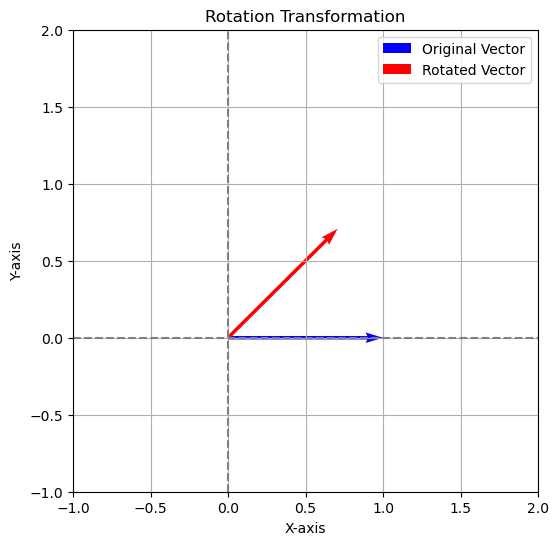

In [13]:
# Create a plot
plt.figure(figsize=(6, 6))
plt.axvline(x=0, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')
plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original Vector')
plt.quiver(0, 0, rotated_vector[0], rotated_vector[1], angles='xy', scale_units='xy', scale=1, color='red', label='Rotated Vector')
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.title('Rotation Transformation')
plt.show() 

In this example, we create a rotation matrix and apply it to the vector [1, 0], resulting in a vector that has been rotated by 45 degrees counterclockwise.


#### Projection Transformation
The projection of a vector 'u' onto another vector 'v' is a way of decomposing the vector 'u' into two components: one that is parallel to 'v;, and one that is perpendicular to 'v'. 
The component that is parallel to 'v' is called the projection of  'u' onto 'v'. The perpendicular component is called rejection.

Mathematically it is defined as,
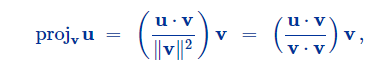
where,
u.v = The dot product of u and v, which measures how much of 'u' points in the direction of 'v'.
v.v = The dot product of 'v' with itself, which is a measure of the magnitude squared of 'v'

**Rejection = 'u'- Projection**


Let's calculate

In [48]:
# Define vectors
u = np.array([3, 4])
v = np.array([1, 2])

# Calculate the projection of u onto v
proj_v_u = (np.dot(u, v) / np.dot(v, v)) * v

# Calculate the rejection of u from v
rej_v_u = u - proj_v_u

print("Projection of u onto v:", proj_v_u)
print("Rejection of u from v:", rej_v_u)


Projection of u onto v: [2.2 4.4]
Rejection of u from v: [ 0.8 -0.4]


Let's visualize

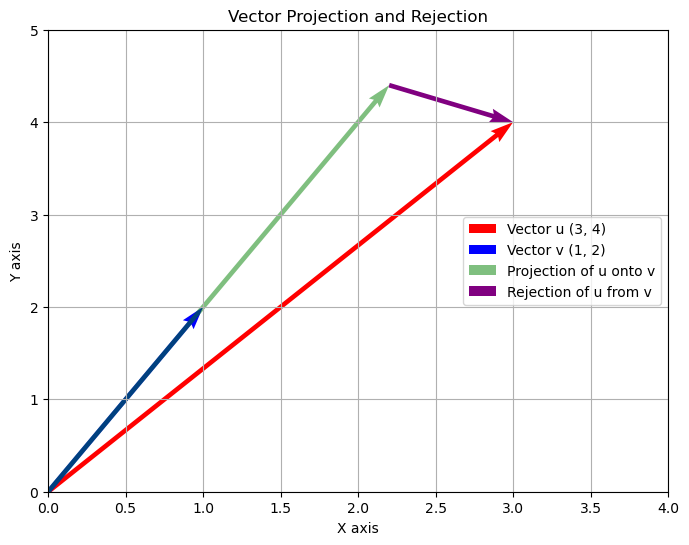

In [54]:
# Create the plot
fig, ax = plt.subplots(figsize=(8,6))

# Plot vector u
ax.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='red', label='Vector u (3, 4)')

# Plot vector v
ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector v (1, 2)')

# Plot projection of u onto v
ax.quiver(0, 0, proj_v_u[0], proj_v_u[1], angles='xy', scale_units='xy', scale=1, alpha=0.5,color='green', label='Projection of u onto v')

# Plot rejection of u from v
ax.quiver(proj_v_u[0], proj_v_u[1], rej_v_u[0], rej_v_u[1], angles='xy', scale_units='xy', scale=1, color='purple', label='Rejection of u from v')

# Set plot limits
ax.set_xlim(0, 4)
ax.set_ylim(0, 5)
#ax.set_aspect('equal')

# Add grid, legend, and titles
ax.grid(True)
ax.legend(loc='center right')
ax.set_title('Vector Projection and Rejection')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')

# Show the plot
plt.show()

### Eigen Vectors:
Eigenvectors are special vectors associated with a square matrix. 

They are vectors that, when multiplied by the matrix, result in a scaled version of themselves. Mathematically, if A is a square matrix and v is an eigenvector of A, then:

**A  v = λ  v**

Here, **λ (lambda) is a scalar called the eigenvalue**. An eigenvector can be scaled by its corresponding eigenvalue when multiplied by the matrix A.

In [56]:
# Define the matrix C
C = np.array([[2, 1],
              [1, 2]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(C)

# Print the eigenvalues
print("Eigenvalues:")
print(eigenvalues)

# Print the eigenvectors
print("\nEigenvectors:")
print(eigenvectors) 

Eigenvalues:
[3. 1.]

Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


### Application in DataScience:

**Principal Component Analysis (PCA):** PCA is a dimensionality reduction technique used to identify patterns in data and reduce its dimensionality while preserving most of its variance. It is based on the computation of eigenvectors and eigenvalues of the covariance matrix of the data. It uses eigenvectors to determine the directions of maximum variance in high-dimensional data, and eigenvalues to measure the significance of these directions.

**Singular Value Decomposition (SVD):**
SVD is a matrix factorization technique used for various tasks such as image compression, recommendation systems, and natural language processing. It decomposes a matrix into three matrices, allowing for efficient computation of the matrix's pseudo-inverse, low-rank approximation, and dimensionality reduction.

### **Conclusion:** 

In this notebook, we've explored the concepts of vector transformations and eigenvectors using NumPy. These foundational topics in linear algebra are essential for understanding how data and geometric entities are manipulated in various fields, from computer graphics to machine learning. By mastering these concepts, we enhance our ability to analyze and solve complex problems efficiently. Continue to explore and apply these tools to uncover deeper insights in your projects and studies.

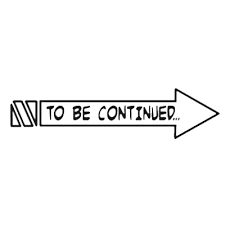